# Savings & Loan Customer Relationship analysis

#### This notebook contains analysis for fictional Savings & Loan Bank. With the help of data received from the company, we have performed analysis that would give insight into company's customers. Further steps can be taken to improve on necessary areas identified by the analysis.

In [1]:
#import required python libraries and data required for analysis

import numpy as np
import matplotlib.pyplot as plt

spreadsheet = np.loadtxt(r'/Users/janhavi/Desktop/Assignment/Python/HW3/HW3-credit-card-consumers.csv', skiprows=1, delimiter=',', dtype=str)

In [2]:
#loads first 5 values for 'credit limit' & 'total revolving balance' variable
credit_info = spreadsheet[:5, 13:15]  
print('Variables relating to credit limit and total revolving balance: \n', credit_info)

Variables relating to credit limit and total revolving balance: 
 [['12691' '777']
 ['8256' '864']
 ['3418' '0']
 ['3313' '2517']
 ['4716' '0']]


## Next cell helps us find the total number of customers 

In [3]:
#helps us find the shape of the dataframe
print(spreadsheet.shape)

(10127, 20)


From the count of number of customers, we infer that total customers = 10127

## Next cell helps us find the range of customer credit limit offered by the bank 

In [4]:
#make a list of customer's credit limit
credit_limit = spreadsheet[:, 13]
#convert NumPy array of string values to float values
credit_limit_float = credit_limit.astype(float)

#find the minimum and maximum value in the credit score
max_credit = np.max(credit_limit_float)
min_credit = np.min(credit_limit_float)
print('Customer credit limit ranges from $',min_credit,'to $',max_credit)

Customer credit limit ranges from $ 1438.3 to $ 34516.0


## Next cell helps us identify the total credit bank offers across all customers. <br> To find percent of customers with less than revolving balance, we look through the average revolving balance across the customers.

In [5]:
#make a list of customer's total revolving balance
revolving_bal = spreadsheet[:, 14]
#convert NumPy array of string values to float values
revolving_bal_float = revolving_bal.astype(float)

total_customers = 10127

#convert total revolving balance to float 
total_revolving_bal = revolving_bal_float.sum()

#sum of credit available across all customers
print(f'Total credit offered by the bank across all customers is $',credit_limit_float.sum()-total_revolving_bal)

#for calculating average revolving balance
avg_revolving_bal = total_revolving_bal/total_customers 

#to count number of customers with < avg revolving balance
less_rev_bal_customers = np.count_nonzero(revolving_bal_float < avg_revolving_bal)

#calculate percent of customers with less than average revolving balance
percent_less_rev = (less_rev_bal_customers / total_customers) * 100
print('About',round(percent_less_rev, 2),'% customers have less than average revolving balance.')

Total credit offered by the bank across all customers is $ 75639977.1
About 44.65 % customers have less than average revolving balance.


## If more than 10% of customers have credit limit above $30,000 , the bank would require a credit card insurance. Next cell helps us identify if it is required or not.

In [6]:
high_credit_customers = np.count_nonzero(credit_limit_float > 30000, axis=0)
high_credit_percent = (high_credit_customers/total_customers)*100
if (high_credit_percent) < 10:
    print ("No, the bank does not need to worry as only about", round(high_credit_percent, 2), "% have a credit limit above $ 30000.")
else:
    print ("Yes they have to worry about credit card insurance as", high_credit_percent, "% have a credit limit above $ 30000.")

No, the bank does not need to worry as only about 6.59 % have a credit limit above $ 30000.


## To check if there is any relation between the customer's education levels and their relationship with the bank, we draw required data from the dataset. The cell below helps us visualise the relationship with the help of frequency table and graphs

Education level frequency count of customers:
[['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
  'Uneducated' 'Unknown']
 ['1013' '451' '3128' '2013' '516' '1487' '1519']]

 Education level frequency percent of customers:
['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown'] [10.00296238  4.4534413  30.88772588 19.87755505  5.09528982 14.6835193
 14.99950627]


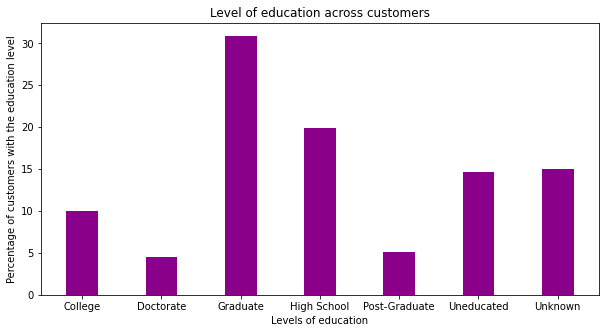

In [7]:
#extract a list for customer education levels
customer_education_level = spreadsheet[:, 5]

#count the number of times each unique value appears in the set
unique_education, count_education = np.unique(customer_education_level, return_counts=True)

#print the count of unique values
print("Education level frequency count of customers:")
education_level_list = np.asarray((unique_education, count_education))
print(education_level_list)

education_level_float = education_level_list[1, :].astype(float)
for i in education_level_float:
    education_level_percent = (education_level_float/total_customers)*100
print ('\n Education level frequency percent of customers:')
print (education_level_list[0, :], education_level_percent)

#create bar plot with education level on the x-axis and the percent of customers with the value on the y-axis
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(education_level_list[0 , :], education_level_percent, color ='darkmagenta',
        width = 0.4)
 
plt.xlabel("Levels of education")
plt.ylabel("Percentage of customers with the education level")
plt.title("Level of education across customers")
plt.show()

##### From the graph we can observe <br>
Most customers have graduate level education

##### From the graph we can infer <br>
Most customers have atleast high school levels of education, with over 50% customers having atleast college level education. <br><br>
But 15% of customers are uneducated while 10% have post-graduate + doctorate degree. There is a lack of discrepency in the data. We don't know education levels of 15% of the customers either. <br> <br>
Hence we can only infer with 100% confidence that the customers' education levels can not be used to predict if they would like to open an account with the bank or not. 

## To identify if the management has a perception of gender inequities in the customer base, we look through credit limit data, sorted by gender. 

In [8]:
gender_list = spreadsheet[:, 3].tolist()

#list with indices of occurance of 'F' gender in the list
indices_female = []
for idx, value in enumerate(gender_list):
    if value == 'F':
        indices_female.append(idx)
#print(find_indices(gender_list, 1))

#list with indices of occurance of 'M' gender in the list
indices_male = []
for idx, value in enumerate(gender_list):
    if value == 'M':
        indices_male.append(idx)

female_credit = [credit_limit_float[i] for i in indices_female]
male_credit = [credit_limit_float[i] for i in indices_male]

# function to find average female credit
def Average(female_credit):
    return sum(female_credit)/len(indices_female)

average_female_credit = Average(female_credit)

# function to find average male credit
def Average(male_credit):
    return sum(male_credit)/len(indices_male)

average_male_credit = Average(male_credit)
 

# Printing average of female and male credit
print("Average female credit =", round(average_female_credit, 2))
print("Average male credit =", round(average_male_credit, 2))

Average female credit = 5023.85
Average male credit = 12685.67


**As we can see, the average female has a credit score only 40% of that of an average male. We infer that the management may be correct about the gender inequality in its customer base.**

## The bank believes that customers that utilize less than 20% or more than 80% of their credit limit may post a risk to the bank's operations. The next cell helps us analyse the percent of customers that fall into this 'risk credit utlization' category. 

In [9]:
#float list of avg customer utilization ratio
avg_utilization=spreadsheet[:, 19]
avg_utilization_float = avg_utilization.astype(float)

#count number of risk customers with utilization < 20% or >80%
risk_utilization_customer_count = 0
for i in avg_utilization_float:
    if i < 0.2 or i>0.8:
        risk_utilization_customer_count += 1
        
#percent of risk utilization customers
risk_utilization_customer_percent = (risk_utilization_customer_count / total_customers) * 100
print ('About', round(risk_utilization_customer_percent, 2), '% customers utilize their credit less than 20% or greater than 80%.')

About 57.28 % customers utilize their credit less than 20% or greater than 80%.


The bank may feel that the customers that use **less than 20%** of their credit limit are a risk because they are essentially 'non-performing' customers. They may not help them bring in profits.

Meanwhile, customers that use **more than 80%** of their credit limit may seem like a risk because they can default in their payments. Extracting money back from these customers can be an added task to the bank.

From the data, we can tell about 60% of the bank's customers fall into their category. **The bank needs to draw more customers that utilise between 20% and 80% of credit limit** to keep their operations flowing smoothly.

## To identify which income range management should target, we try to identify what income category most of their customer base falls in. 

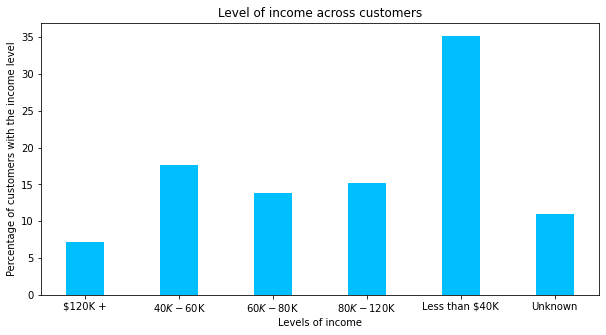

In [10]:
#create a list for customer education levels
income_level = spreadsheet[:, 7]

#count the number of customers in each unique income category
unique_income, count_income = np.unique(income_level, return_counts=True)

#to calculate % of customers with each unique income category
income_level_list = np.asarray((unique_income, count_income))
income_level_float = income_level_list[1, :].astype(float)
for i in income_level_float:
    income_level_percent = (income_level_float/total_customers)*100

#create bar plot to see percentage of customers in each income category
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(income_level_list[0 , :], income_level_percent, color ='deepskyblue',
        width = 0.4)
 
plt.xlabel("Levels of income")
plt.ylabel("Percentage of customers with the income level")
plt.title("Level of income across customers")
plt.show()

##### From the graph, we can infer: 
**Most of the bank customers earn less than $40K per year. Hence this is the category management should target in their advertisement campaigns**

## Additionally, we can look into data to identify how long most customers have had a relationship with the bank for. This can help us analyse if there is a pattern to the bank getting new customers. 

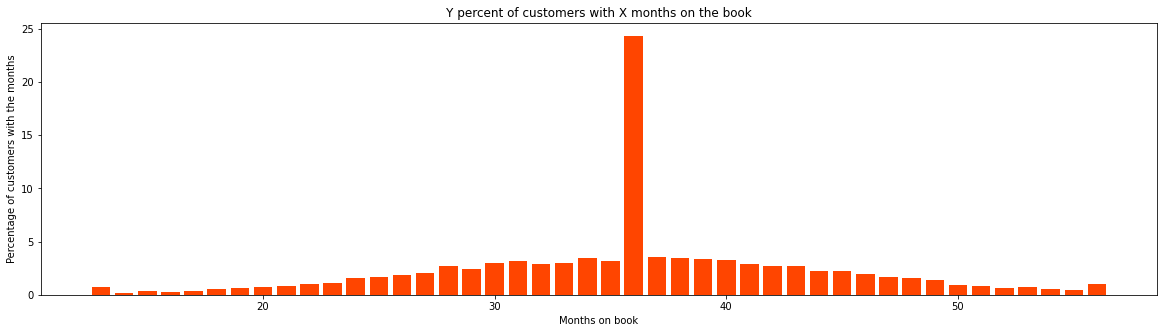

In [11]:
#extract a list for customer months on book
months_on_book = spreadsheet[:, 9]
months_on_book = spreadsheet[:, 9].astype(float)

#count the number of times each month on book value appears in the set
unique_months, count_months = np.unique(months_on_book, return_counts=True)

#print the count of unique values
months_list = np.asarray((unique_months, count_months))

months_on_book_float = months_list[1, :].astype(float)
for i in months_on_book_float:
    months_on_book_percent = (months_on_book_float/total_customers)*100

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(months_list[0 , :], months_on_book_percent, color ='orangered',
        width = 0.8)
 
plt.xlabel("Months on book")
plt.ylabel("Percentage of customers with the months")
plt.title("Y percent of customers with X months on the book")
plt.show()

##### From the graph, we can infer:

- Most customers have been on the book since 36 months. 
- Further data from that time can be used to identify the potential reasons why the bank attracted most customers during that time period. The bank can replicate the strategy to potentally attract more customers.
